<a href="https://colab.research.google.com/github/Vivekchavda1374/ML/blob/main/Exp_9_KMeans_post_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 1. Importing the necessary libraries and Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [5]:
# 2. Importing the Dataset

dataset = pd.read_csv("/content/xclara.csv")
dataset.columns = ["V1" , "V2"]

In [6]:
# 3. Geting the Statistics of a Dataset

dataset.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


In [7]:

init_centroids = random.sample(range(0, len(dataset)), 3)
centroids = []
for i in init_centroids:
    centroids.append(dataset.iloc[i])
centroids = np.array(centroids)
centroids


array([[ 42.09716,  72.15952],
       [ 25.34895,  55.25141],
       [ 79.33412, -22.18659]])

In [8]:
# 5. Preprocessing the Data

X=np.array(dataset)

In [9]:
# 6. Function to Claculate the Euclidian Distance

def  Calculate_Distance(i,j):
  return np.sqrt(np.sum((i-j)**2))

In [10]:
# 7. Function to find the Nearest Centroid

def Find_Nerest_Centroid(centroids,X):
  assigned_cluster=[]
  for i in X:
    dist=[]#list of calced distances
    for j in centroids:
      dist.append(Calculate_Distance(i,j))
    assigned_cluster.append(np.argmin(dist))
  return assigned_cluster

In [11]:
# 8. Function For Getting the New Centroids i.e. Updating the Old Centroids

def Calculating_Centroids(cluster_number,X):
  new_centorids=[]
  new_df=pd.concat([pd.DataFrame(X),pd.Series(cluster_number,name='cluster')],axis=1)
  for c in set(new_df['cluster']):
    current_cluster=new_df[new_df['cluster']==c][new_df.columns[:-1]]
    cluster_mean=current_cluster.mean(axis=0)
    new_centorids.append(cluster_mean)
    return new_centorids

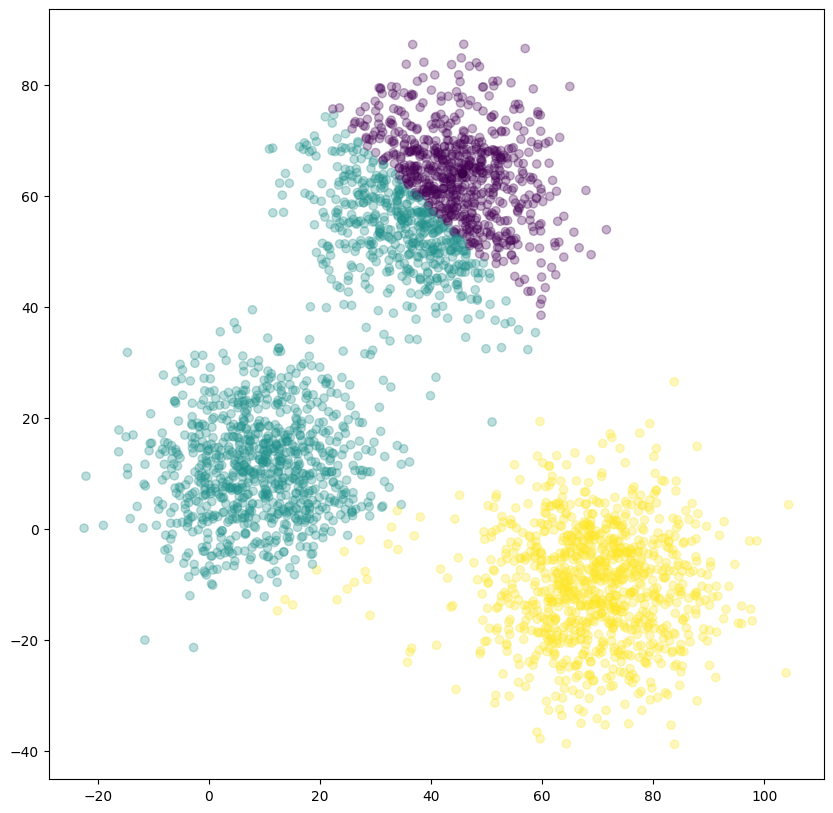

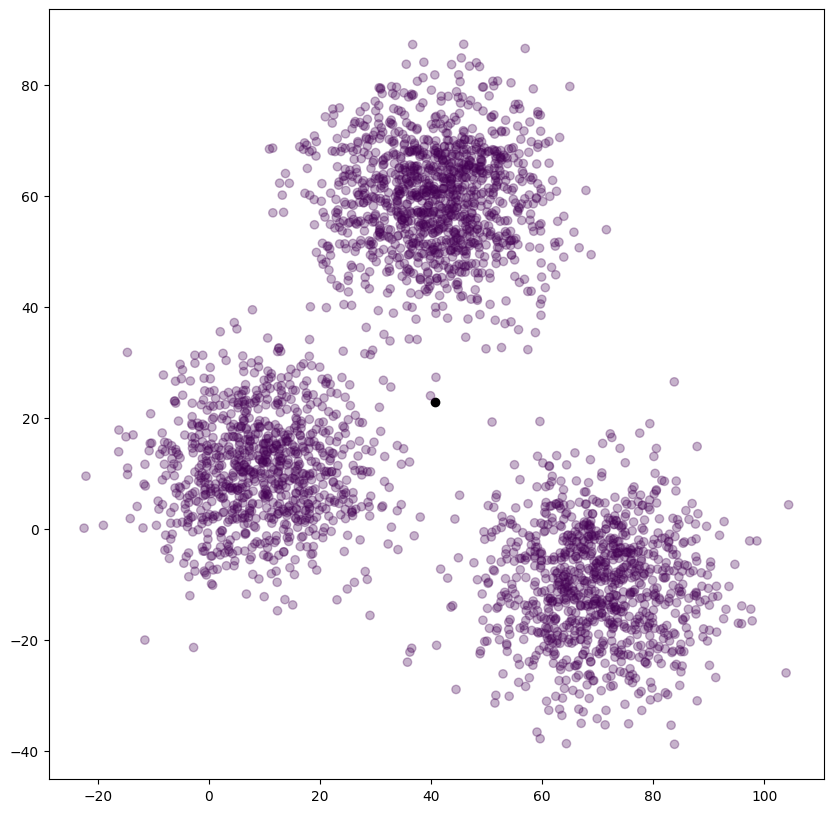

In [12]:
# 9. Training the Model

epochs=10
for i in range(epochs):
  get_centroids=Find_Nerest_Centroid(centroids,X)
  centroids=Calculating_Centroids(get_centroids,X)
  if i == 0 or i == epochs - 1 :
    plt.figure(figsize=(10,10))
    plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],color="black")
    plt.scatter(X[:,0],X[:,1],c=get_centroids,alpha =0.3)
    plt.show()